<a href="https://colab.research.google.com/github/Leonardopedroti/Introduction_ML/blob/main/Introduction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação e coleta de dados

In [ ]:
!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [3]:
from pandas_profiling import ProfileReport

<ipython-input-3-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [5]:
#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [6]:
# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [7]:
# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [8]:
# outras
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

Observação: A coluna Unnamed: 0 é criada pelo pandas quando nenhum cabeçalho é fornecido ou quando há uma coluna adicional de índice de linha sem nome no arquivo CSV. Para evitar que a coluna "Unnamed: 0" apareça ao ler um arquivo CSV com o pandas, você pode especificar qual coluna é o índice do DataFrame usando o parâmetro 'index_col' da função read_csv().

In [9]:
#importando a base de dados
df = pd.read_csv('/content/dataset.csv', index_col=0)
display(df)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Observação: Para uma análise rápida, irei utilzar o pandas profiling.

In [ ]:
#Criação do perfil da base de dados
profile = ProfileReport(df)
profile.to_file('Relatório.html')

#Pré-processamento de dados


In [12]:
# remoção de itens duplicados
df = df.drop_duplicates()
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_classe
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [13]:
# Criando classes de popularidade
df[df["popularity"] >=80]

conditionlist = [
    (df['popularity'] >= 80),
    (df['popularity'] <80)]

choicelist = [1,0]
df['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
df['pop_classe'] = df['pop_classe'].astype(int)
df.head()

<ipython-input-13-432403abd656>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
<ipython-input-13-432403abd656>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop_classe'] = df['pop_classe'].astype(int)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_classe
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [14]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
pop_classe          0
dtype: int64

In [15]:
#removendo valores nulos
df = df.dropna() 

In [16]:
df = df.drop(columns=['popularity'])

In [17]:
#Mantendo somente colunas quantitativas e que são importantes para o modelo
df_quantitative = df
cols_to_drop = []
for column in df:
    if df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = df.drop(columns=cols_to_drop)

print(f"Tamanho do dataset para o modelo: {df_quantitative.shape}")

df_quantitative.head()

Tamanho do dataset para o modelo: (113549, 15)


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [18]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [19]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_normal=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())
df_quantitative_normal.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


# Divisão dos dados e validação cruzada

In [20]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_normal, test_size=0.2, random_state=42, shuffle=True)

In [21]:
# visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

0.0    0.98941
1.0    0.01059
Name: pop_classe, dtype: float64

In [22]:
# visualizando as proporções da variável alvo
df_test.pop_classe.value_counts(normalize=True)

0.0    0.989564
1.0    0.010436
Name: pop_classe, dtype: float64

In [23]:
# dividindo X e y
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [25]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}\n")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((72672, 13), (18167, 13), (72672,), (18167,))

Proporção do df_train para classe=1: 0.0106

Proporção de X_train para classe=1:  0.0106

Proporção de X_val para classe=1:    0.0106


#Definindo a Baseline

In [26]:
# Instanciando o modelo
logReg = LogisticRegression()

# Treinando o modelo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

In [27]:
logReg.coef_.tolist()[0]

[-1.1656256726638992,
 2.1778538611300378,
 -1.4509371615748807,
 0.03178521803886474,
 4.669393523881255,
 -0.07821556173951738,
 -0.3895659199071239,
 -1.7649310831492278,
 -2.665094169123737,
 -1.5591831657883897,
 -0.43473944250000807,
 -0.7057343596649106,
 -1.0058377322549046]

In [28]:
df_coef = df_quantitative_normal.drop(columns='pop_classe')
df_coef.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [29]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}
df = pd.DataFrame(data)
df

,Features,Coef
0,duration_ms,-1.165626
1,danceability,2.177854
2,energy,-1.450937
3,key,0.031785
4,loudness,4.669394
5,mode,-0.078216
6,speechiness,-0.389566
7,acousticness,-1.764931
8,instrumentalness,-2.665094
9,liveness,-1.559183


In [30]:
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894044473800088
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894313865800628
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Reamostragem, teste e validação.

In [31]:
# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

In [32]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)
     

Counter({0.0: 770, 1.0: 770})


In [33]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.2174822480321462
precision: 0.008343850792315243
recall:    0.6197916666666666
f1:        0.016466030164660302
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.18395992734078273
precision: 0.009387782471669014
recall:    0.7291666666666666
f1:        0.018536908308507117
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.16706115484119557
precision: 0.011061657284984946
recall:    0.8802083333333334
f1:        0.021848739495798318
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.029779270105135685
precision: 0.010445917106593284
recall:    0.96875
f1:        0.020668963218135352
-------------------------------

In [34]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [35]:
for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo:    LogisiticRegression

accuracy:  0.6132548026641713
precision: 0.019949423995504357
recall:    0.7395833333333334
f1:        0.038850889192886456
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.978697638575439
precision: 0.26730310262529833
recall:    0.5833333333333334
f1:        0.3666121112929624
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9838718555622833
precision: 0.35103244837758113
recall:    0.6197916666666666
f1:        0.44821092278719393
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.988220399625695
precision: 0.4576923076923077
recall:    0.6197916666666666
f1:        0.5265486725663716
-----------------------------------

In [36]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)
     

Counter({0.0: 71902, 1.0: 71902})


In [37]:

for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo:    LogisiticRegression

accuracy:  0.6300434854406342
precision: 0.020701805902217003
recall:    0.734375
f1:        0.040268456375838924
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9441845103759564
precision: 0.11226415094339623
recall:    0.6197916666666666
f1:        0.1900958466453674
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9664226344470743
precision: 0.17034700315457413
recall:    0.5625
f1:        0.26150121065375304
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9887708482413167
precision: 0.47435897435897434
recall:    0.578125
f1:        0.5211267605633803
------------------------------------------------------------
---

In [38]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 14380, 1.0: 7190})


In [39]:
for nome, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.8659657620961083
precision: 0.02619349387410224
recall:    0.3229166666666667
f1:        0.04845642829230168
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9101667859305334
precision: 0.07647058823529412
recall:    0.6770833333333334
f1:        0.13742071881606766
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9582759949358728
precision: 0.15318627450980393
recall:    0.6510416666666666
f1:        0.24801587301587302
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9880552650410084
precision: 0.4528301886792453
recall:    0.625
f1:        0.525164113785558
------------------------------------------------

#Avaliação dos Modelos

In [40]:
# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values
     

In [41]:
#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


In [42]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 6.0 minutos

kfold nº: 2
tempo intermediário: 11.9 minutos

kfold nº: 3
tempo intermediário: 18.0 minutos

kfold nº: 4
tempo intermediário: 24.0 minutos

kfold nº: 5
tempo intermediário: 29.9 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9877944749223071
precision: 0.43852476357441833
recall:    0.5415584415584416
f1:        0.48431041616458126
AUC:       0.7670658318511043
------------------------------------------------------------
Tempo do loop para validação cruzada: 29.9 minutos


#Avaliação do modelo ajustado

<ipython-input-51-9624098dd0a5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-51-9624098dd0a5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-51-9624098dd0a5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-51-9624098dd0a5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-51-9624098dd0a5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


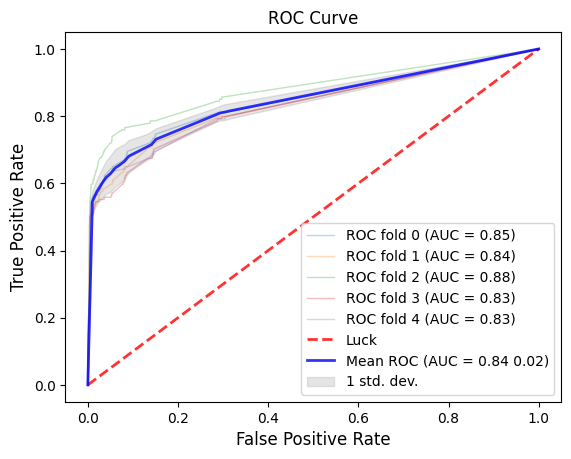

In [51]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label= r'Mean ROC (AUC = %0.2f %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

#O Modelo Final

In [52]:
# separando novamente os dados
X_all = df_train.drop('pop_classe', axis=1)
y_all = df_train.pop_classe

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [53]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [54]:
lista = model.steps[1][1].feature_importances_

In [55]:
print(lista.tolist())

[0.0867344064322981, 0.09068665919019263, 0.11023421638775464, 0.036154869998979676, 0.11961541230117591, 0.005798723940452734, 0.08494572181754126, 0.10005161417674772, 0.10968185173627089, 0.08600811393419704, 0.08996804351795376, 0.07533481052669551, 0.004785556039740228]


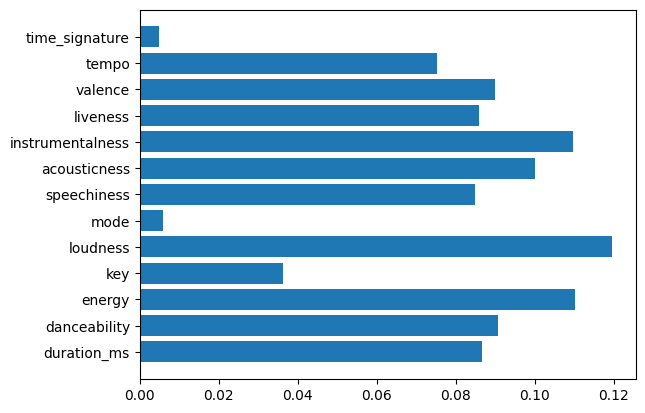

In [58]:
# lista de nomes
nomes = df_quantitative_normal.columns

plt.barh(df_quantitative_normal.drop(columns=['pop_classe']).columns.tolist(), lista.tolist())

plt.show()